In [2]:
import cv2
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
def dominant_colors(image_path, k=3):
    # Charger l'image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Reshape de l'image à 2D
    pixels = image.reshape(-1, 3)
    
    # K-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    
    # Obtenir les couleurs dominantes
    colors = kmeans.cluster_centers_
    colors = colors.astype(int)
    
    return colors

In [4]:
def color_similarity(colors1, colors2):
    # Calcule la distance euclidienne moyenne entre les couleurs dominantes
    distances = []
    for color1 in colors1:
        for color2 in colors2:
            distance = np.linalg.norm(color1 - color2)
            distances.append(distance)
    return np.mean(distances)

In [5]:
def plot_colors(colors, title):
    # Afficher les couleurs dominantes
    plt.figure(figsize=(6, 2))
    plt.title(title)
    plt.axis('off')
    
    # Créer une image de couleur
    color_img = np.zeros((100, 600, 3), dtype=np.uint8)
    step = color_img.shape[1] // len(colors)
    
    for i, color in enumerate(colors):
        color_img[:, i * step:(i + 1) * step] = color
    
    plt.imshow(color_img)
    plt.show()

Similarity score between img_1.png and img_2.png: 127.41344845079509


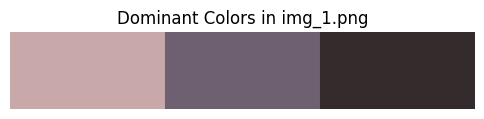

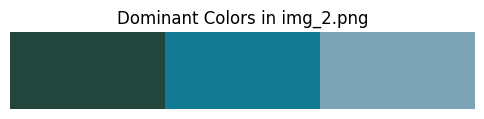

In [6]:
image_folder = '/Users/marouandgh/IdeaProjects/multi/img'  # Remplacez par le chemin de votre dossier d'images
image_names = os.listdir(image_folder)
image_paths = [os.path.join(image_folder, image_name) for image_name in image_names if image_name.endswith(('.jpg', '.png'))]

dominant_colors_list = [dominant_colors(image_path) for image_path in image_paths]

# Calculer la similarité entre les premières images
similarity_score = color_similarity(dominant_colors_list[0], dominant_colors_list[1])
print(f'Similarity score between {image_names[0]} and {image_names[1]}: {similarity_score}')

# Afficher les couleurs dominantes
plot_colors(dominant_colors_list[0], f'Dominant Colors in {image_names[0]}')
plot_colors(dominant_colors_list[1], f'Dominant Colors in {image_names[1]}')